# Data analysis using pandas
After extracting data from the dataset and transform it into dataframe, more analysis can be done using pandas. In this notebook, we will explore some of the basic data analysis that can be done using pandas.

## Part 1: Load the data

In [2]:
import pandas as pd

In [3]:
file_path = 'D:/Projects/fiji-training-2024/data/sample_t2m_fiji.csv'

In [6]:
df = pd.read_csv(file_path, sep=',', parse_dates=['time'], index_col='time')
df

,latitude,longitude,t2m
time,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529
2023-06-01 01:00:00,-17.8,177.4167,301.570176
2023-06-01 02:00:00,-17.8,177.4167,301.615832
2023-06-01 03:00:00,-17.8,177.4167,301.472180
2023-06-01 04:00:00,-17.8,177.4167,300.758050
...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,292.376356
2023-06-30 20:00:00,-17.8,177.4167,293.933152
2023-06-30 21:00:00,-17.8,177.4167,295.545141


Let's convert the temperature to Celsius and add it to a new column. We will also round the value to 2 decimal places.

In [9]:
#convert the temperature to Celsius and add it to a new column
df['t2m_C'] = df['t2m'] - 273.15
# round the value to 2 decimal places
df['t2m_C'] = df['t2m_C'].round(2)
df

,latitude,longitude,t2m,t2m_C
time,,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529,28.35
2023-06-01 01:00:00,-17.8,177.4167,301.570176,28.42
2023-06-01 02:00:00,-17.8,177.4167,301.615832,28.47
2023-06-01 03:00:00,-17.8,177.4167,301.472180,28.32
2023-06-01 04:00:00,-17.8,177.4167,300.758050,27.61
...,...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,292.376356,19.23
2023-06-30 20:00:00,-17.8,177.4167,293.933152,20.78
2023-06-30 21:00:00,-17.8,177.4167,295.545141,22.40


Pandas also provide built-in plotting function that can be used to plot the data. Let's plot the temperature data.

<Axes: xlabel='time'>

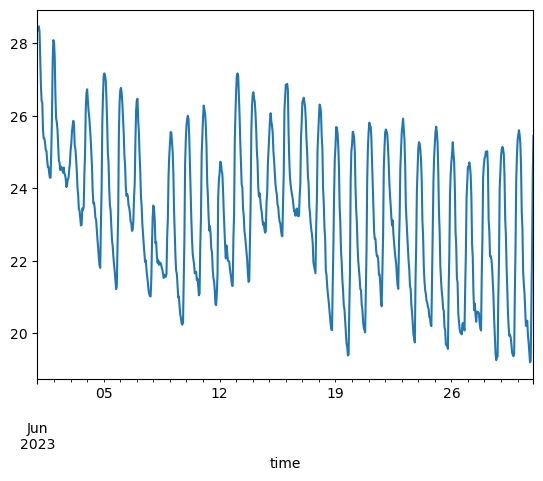

In [10]:
# plot using pandas
df['t2m_C'].plot()

## Part 2: Data analysis

Pandas provide a method to display statistics of the data by using .describe() method. This method will display the count, mean, standard deviation, minimum, maximum, and the quartiles of the data.

In [21]:
# display statistics of the data
df.describe()

,latitude,longitude,t2m,t2m_C
count,7.200000e+02,7.200000e+02,720.000000,720.000000
mean,-1.780000e+01,1.774167e+02,296.478775,23.328778
std,3.555183e-15,2.844147e-14,2.029997,2.030103
min,-1.780000e+01,1.774167e+02,292.337697,19.190000
25%,-1.780000e+01,1.774167e+02,294.827959,21.675000
50%,-1.780000e+01,1.774167e+02,296.509918,23.360000
75%,-1.780000e+01,1.774167e+02,298.156933,25.010000
max,-1.780000e+01,1.774167e+02,301.615832,28.470000


In [25]:
df['t2m_C'].describe(percentiles=[0.25, 0.75, 0.85, 0.95])

count    720.000000
mean      23.328778
std        2.030103
min       19.190000
25%       21.675000
50%       23.360000
75%       25.010000
85%       25.541500
95%       26.460500
max       28.470000
Name: t2m_C, dtype: float64

We can do daily aggregation to see max, min, and mean, or other statistics of the data. This can be done using the .resample() method. The method will take the frequency of the aggregation as the argument. For example, 'D' for daily, 'W' for weekly, 'M' for monthly, etc.

In [11]:
# get the daily maximum temperature
df_daily_max = df['t2m_C'].resample('D').max()
df_daily_max

time
2023-06-01    28.47
2023-06-02    28.04
2023-06-03    26.62
2023-06-04    26.73
2023-06-05    27.17
2023-06-06    26.77
2023-06-07    26.47
2023-06-08    24.88
2023-06-09    25.55
2023-06-10    26.00
2023-06-11    26.28
2023-06-12    26.08
2023-06-13    27.17
2023-06-14    26.65
2023-06-15    26.52
2023-06-16    26.88
2023-06-17    26.50
2023-06-18    26.31
2023-06-19    25.69
2023-06-20    25.56
2023-06-21    25.81
2023-06-22    25.62
2023-06-23    25.92
2023-06-24    25.27
2023-06-25    25.70
2023-06-26    25.27
2023-06-27    24.71
2023-06-28    25.02
2023-06-29    25.14
2023-06-30    25.60
Freq: D, Name: t2m_C, dtype: float64

<Axes: xlabel='time'>

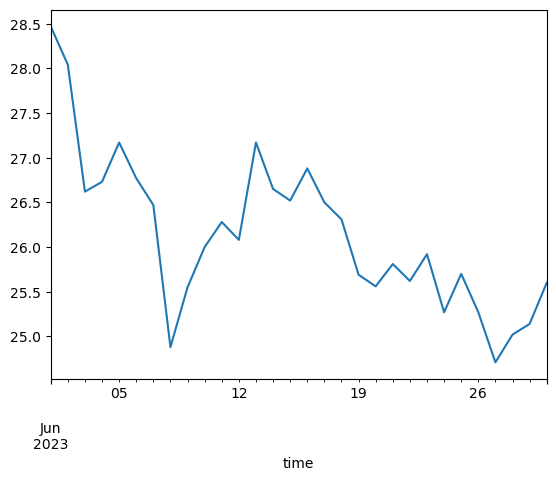

In [12]:
# plot the daily maximum temperature
df_daily_max.plot()

In [14]:
# get the daily minimum temperature
df_daily_min = df['t2m_C'].resample('D').min()

<Axes: xlabel='time'>

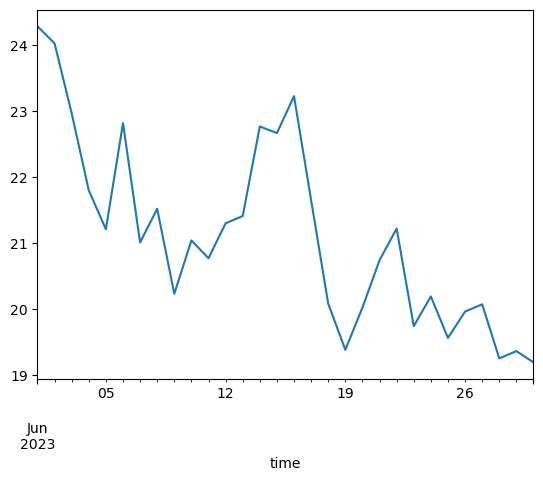

In [15]:
# plot the daily minimum temperature
df_daily_min.plot()

In [16]:
# get the daily mean temperature
df_daily_mean = df['t2m_C'].resample('D').mean()

<Axes: xlabel='time'>

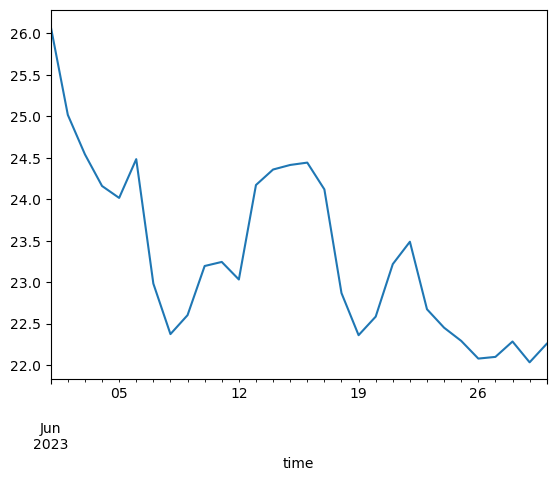

In [18]:
# plot the daily mean temperature
df_daily_mean.plot()

In [26]:
# use all aggregation
df_daily = df['t2m_C'].resample('D').agg(['min', 'max', 'mean', 'std'])
df_daily

,min,max,mean,std
time,,,,
2023-06-01,24.29,28.47,26.080833,1.488112
2023-06-02,24.03,28.04,25.013750,1.075420
2023-06-03,22.97,26.62,24.538333,1.107106
2023-06-04,21.80,26.73,24.157083,1.611282
2023-06-05,21.21,27.17,24.013333,2.095006
2023-06-06,22.82,26.77,24.480417,1.356221
2023-06-07,21.01,26.47,22.981250,1.770739
2023-06-08,21.52,24.88,22.372500,0.920015
2023-06-09,20.23,25.55,22.600833,1.999589


In [27]:
# Calculate weekly and monthly mean temperatures
weekly_mean = df['t2m_C'].resample('W').mean()
monthly_mean = df['t2m_C'].resample('M').mean()

By default, pandas resamples weekly data from Sunday to Saturday. You can adjust the resampling frequency to start from any other day of the week by changing the W-MON to another weekday. Here are the options:

    W-SUN: Sunday
    W-MON: Monday
    W-TUE: Tuesday
    W-WED: Wednesday
    W-THU: Thursday
    W-FRI: Friday
    W-SAT: Saturday

Find daily temperature range

In [31]:
df_daily['range'] = df_daily['max'] - df_daily['min']
df_daily

,min,max,mean,std,range
time,,,,,
2023-06-01,24.29,28.47,26.080833,1.488112,4.18
2023-06-02,24.03,28.04,25.013750,1.075420,4.01
2023-06-03,22.97,26.62,24.538333,1.107106,3.65
2023-06-04,21.80,26.73,24.157083,1.611282,4.93
2023-06-05,21.21,27.17,24.013333,2.095006,5.96
2023-06-06,22.82,26.77,24.480417,1.356221,3.95
2023-06-07,21.01,26.47,22.981250,1.770739,5.46
2023-06-08,21.52,24.88,22.372500,0.920015,3.36
2023-06-09,20.23,25.55,22.600833,1.999589,5.32


Find hourly pattern

In [32]:
# get the hourly mean temperature by using groupby
df_hourly = df['t2m_C'].groupby(df.index.hour).mean()
df_hourly

time
0     25.759667
1     25.912667
2     25.877000
3     25.698667
4     25.379333
5     24.846333
6     24.031000
7     23.668000
8     23.061667
9     22.766000
10    22.552667
11    22.357000
12    22.070000
13    22.008667
14    21.808000
15    21.614333
16    21.476000
17    21.315333
18    21.172000
19    21.169000
20    22.253000
21    23.087333
22    24.699333
23    25.307667
Name: t2m_C, dtype: float64

Find anomaly

In [33]:
# Calculate long-term average temperature
long_term_avg = df['t2m_C'].mean()

df['anomaly'] = df['t2m_C'] - long_term_avg
df

,latitude,longitude,t2m,t2m_C,anomaly
time,,,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529,28.35,5.021222
2023-06-01 01:00:00,-17.8,177.4167,301.570176,28.42,5.091222
2023-06-01 02:00:00,-17.8,177.4167,301.615832,28.47,5.141222
2023-06-01 03:00:00,-17.8,177.4167,301.472180,28.32,4.991222
2023-06-01 04:00:00,-17.8,177.4167,300.758050,27.61,4.281222
...,...,...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,292.376356,19.23,-4.098778
2023-06-30 20:00:00,-17.8,177.4167,293.933152,20.78,-2.548778
2023-06-30 21:00:00,-17.8,177.4167,295.545141,22.40,-0.928778


We can also use conditional selection to label the data. For example, we want to add a new column named 'label' containing 'above' or 'below' if the value is above or below the long-term average temperature.

In [35]:
def label_temp(temp):
    if temp > long_term_avg:
        return 'above'
    else:
        return 'below'
    
df['label'] = df['t2m_C'].apply(label_temp)
df

,latitude,longitude,t2m,t2m_C,anomaly,label
time,,,,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529,28.35,5.021222,above
2023-06-01 01:00:00,-17.8,177.4167,301.570176,28.42,5.091222,above
2023-06-01 02:00:00,-17.8,177.4167,301.615832,28.47,5.141222,above
2023-06-01 03:00:00,-17.8,177.4167,301.472180,28.32,4.991222,above
2023-06-01 04:00:00,-17.8,177.4167,300.758050,27.61,4.281222,above
...,...,...,...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,292.376356,19.23,-4.098778,below
2023-06-30 20:00:00,-17.8,177.4167,293.933152,20.78,-2.548778,below
2023-06-30 21:00:00,-17.8,177.4167,295.545141,22.40,-0.928778,below


Find trend / smoothing data using rolling window means

<Axes: xlabel='time'>

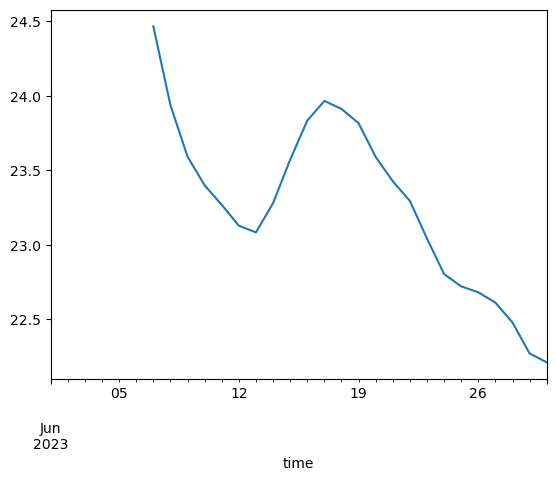

In [20]:
# Smoothing data using rolling window
df_daily_mean.rolling(window=7).mean().plot()

## Exercise
Use sample data from another city you have extracted from the previous part. Then perform the following analysis:
1. Convert the temperature to Celsius and add it to a new column. Round the value to 2 decimal places.
2. Convert the temperature to Fahrenheit and add it to a new column. Round the value to 2 decimal places. Hint: you can use .apply method or the formula °F = (K − 273.15) × 1.8 + 32.
3. Display the statistics of the full dataset. Save it to a variable.
4. Do daily aggregation for temperature in Celsius. Calculate the minimum, maximum, mean. Save it to a variable.
5. Calculate the temperature range for daily data.
6. Do weekly aggregation for temperature in Celsius. Calculate the mean. Save it to a variable.
7. Do monthly aggregation for temperature in Celsius. Calculate the mean. Save it to a variable. Use it as reference for long term average.
8. Calculate the anomaly of the temperature data. Use the daily mean temperature dataframe.
9. Label the data as 'above' or 'below' the long term average temperature.


In [ ]:
# Load the data
file_path = ...
df = pd.read_csv(...)

In [ ]:
# Convert the temperature to Celsius and add it to a new column
df['...'] = df['...'] - ...

In [ ]:
# Convert the temperature to Fahrenheit and add it to a new column
df['...'] = (df['...'] - ...) * ... + ...

In [ ]:
# Display the statistics of the full dataset
stats = df.

In [ ]:
# Do daily aggregation for temperature in Celsius
df_daily = df['...'].resample('D').agg(['min', 'max', 'mean'])

In [ ]:
# Calculate the temperature range for daily data
df_daily['range'] = ...

In [ ]:
# Do weekly aggregation for temperature in Celsius
weekly_mean = df['...'].resample('...').

In [ ]:
# Do monthly aggregation for temperature in Celsius
monthly_mean = df['...'].resample('...').

In [ ]:
# Calculate the anomaly of the temperature data
long_term_avg = ...
df['...'] = df['...'] - ...

In [ ]:
# Label the data as 'above' or 'below' the long term average temperature
def label_temp(temp):
    if temp > long_term_avg:
        return '...'
    else:
        return '...'

df['...'] = df['...'].apply(...)

In [ ]:
# Save all the results to a new file
output_file = '...'

# Some Inspiration
With observation data you have for the Nausori station, do separate analysis from the previous exercise. You can try to do comparison between reanalysis data and real observation data. After, you can do analysis for the bias between the reanalysis data and the observation, and maybe derive some correction factor for the reanalysis data.